In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

In [11]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.6.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
machine          : AMD64
processor        : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : None.None

pandas           : 1.0.1
numpy            : 1.18.1
pytz             : 2019.3
dateutil         : 2.8.1
pip              : 20.0.2
setuptools       : 45.2.0.post20200210
Cython           : 0.29.15
pytest           : 5.3.5
hypothesis       : 5.5.4
sphinx           : 2.4.0
blosc            : None
feather          : None
xlsxwriter       : 1.2.7
lxml.etree       : 4.6.1
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.1
IPython          : 7.12.0
pandas_datareader: None
bs4              : 4.8.2
bottleneck       : 1.3.2
fastparquet      : None
gcsfs            : None
lxml.etree       :

In [12]:
conda list anaconda

# packages in environment at C:\ProgramData\Anaconda3:
#
# Name                    Version                   Build  Channel
anaconda                  2020.02                  py37_0  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.12                   py37_0  
anaconda-project          0.8.4                      py_0  

Note: you may need to restart the kernel to use updated packages.


WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(140): Could not remove or rename C:\ProgramData\Anaconda3\conda-meta\lxml-4.5.0-py37h1350720_0.json.  Please remove this file manually (you may need to reboot to free file handles)


In [13]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 12,Unnamed: 13
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,NaN,NaN
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,NaN,NaN
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,NaN,NaN
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,NaN,NaN
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,NaN,NaN
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,NaN,NaN
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,NaN,NaN
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,NaN,NaN


In [56]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 12,Unnamed: 13
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,0.0,0.0
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,NaN,NaN
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,NaN,NaN
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,NaN,NaN
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,NaN,NaN
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,NaN,NaN
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,NaN,NaN
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,NaN,NaN


In [15]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

# Data Preprocessing

In [16]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [17]:
df['quality'] = df['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [19]:
df['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

In [59]:
df.isnull().sum()

fixed acidity              0
volatile acidity           0
citric acid                0
residual sugar             0
chlorides                  0
free sulfur dioxide        0
total sulfur dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                    0
Unnamed: 12             1599
Unnamed: 13             1599
dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['quality'] = le.fit_transform(df['quality'])

df['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int32>

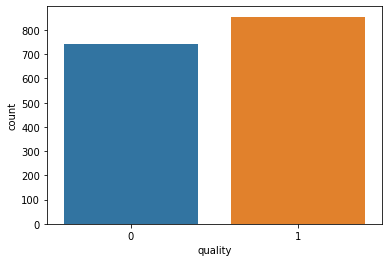

In [23]:
sns.countplot(df['quality'])

In [61]:
df.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Unnamed: 12,Unnamed: 13


In [57]:
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Unnamed: 12                  NaN
Unnamed: 13                  NaN
Name: quality, dtype: float64


# DATA VISUALIZATION

# Bivariate Analysis

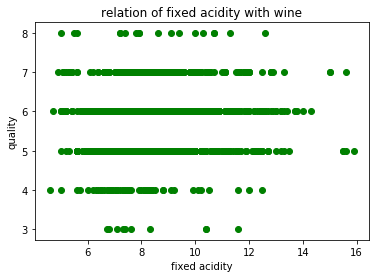

In [5]:
plt.scatter(df['fixed acidity'], df['quality'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.show()

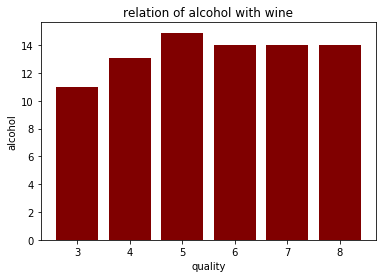

In [67]:
plt.bar(df['quality'],df['alcohol'], color = 'maroon')
plt.title('relation of alcohol with wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

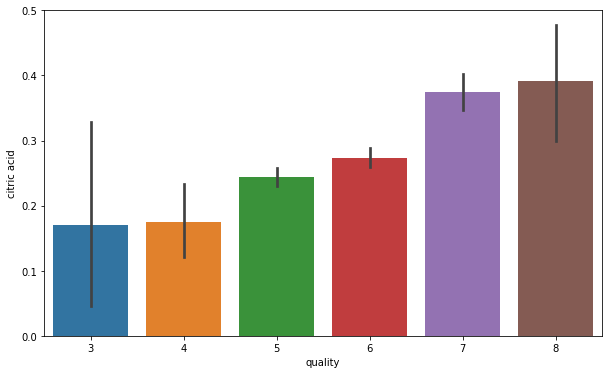

In [73]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df)

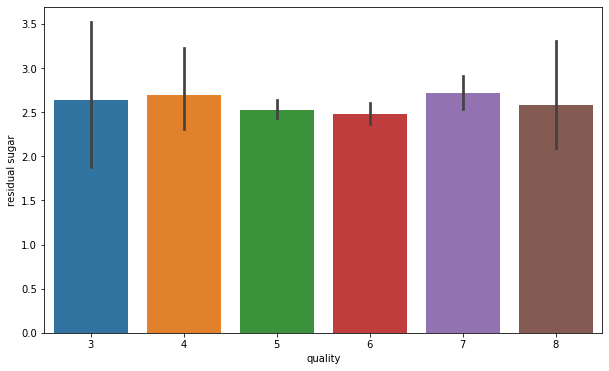

In [72]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

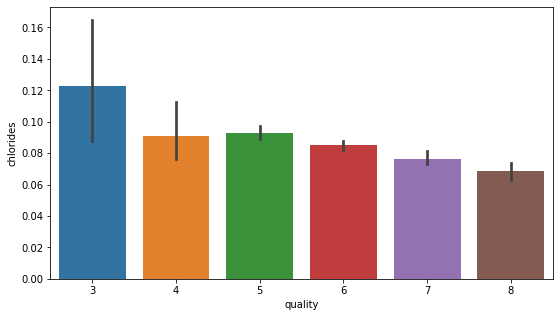

In [77]:
fig = plt.figure(figsize = (9,5))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

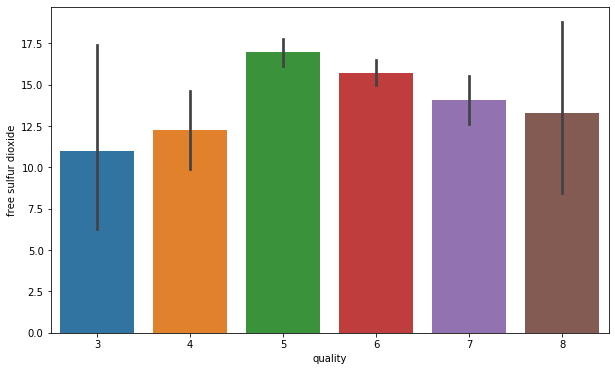

In [79]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

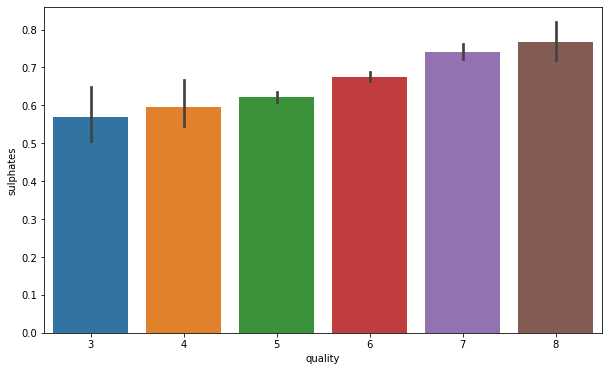

In [81]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

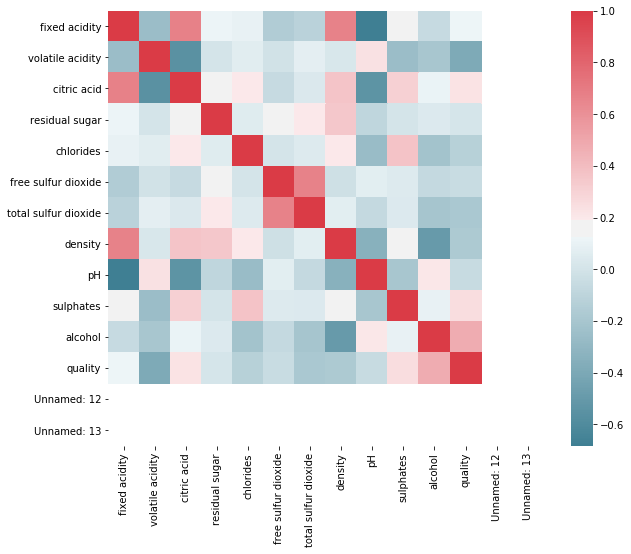

In [83]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# The strongly correlated items are :

In [ ]:
1.fixed acidity and citric acid. 2.free sulphur dioxide and total sulphor dioxide. 3.fixed acidity and density.

4. alcohol and quality.

so, from above points there is a clear inference that alcohol is the most important characteristic to determine the quality of wine.

# The weekly correlated items are :

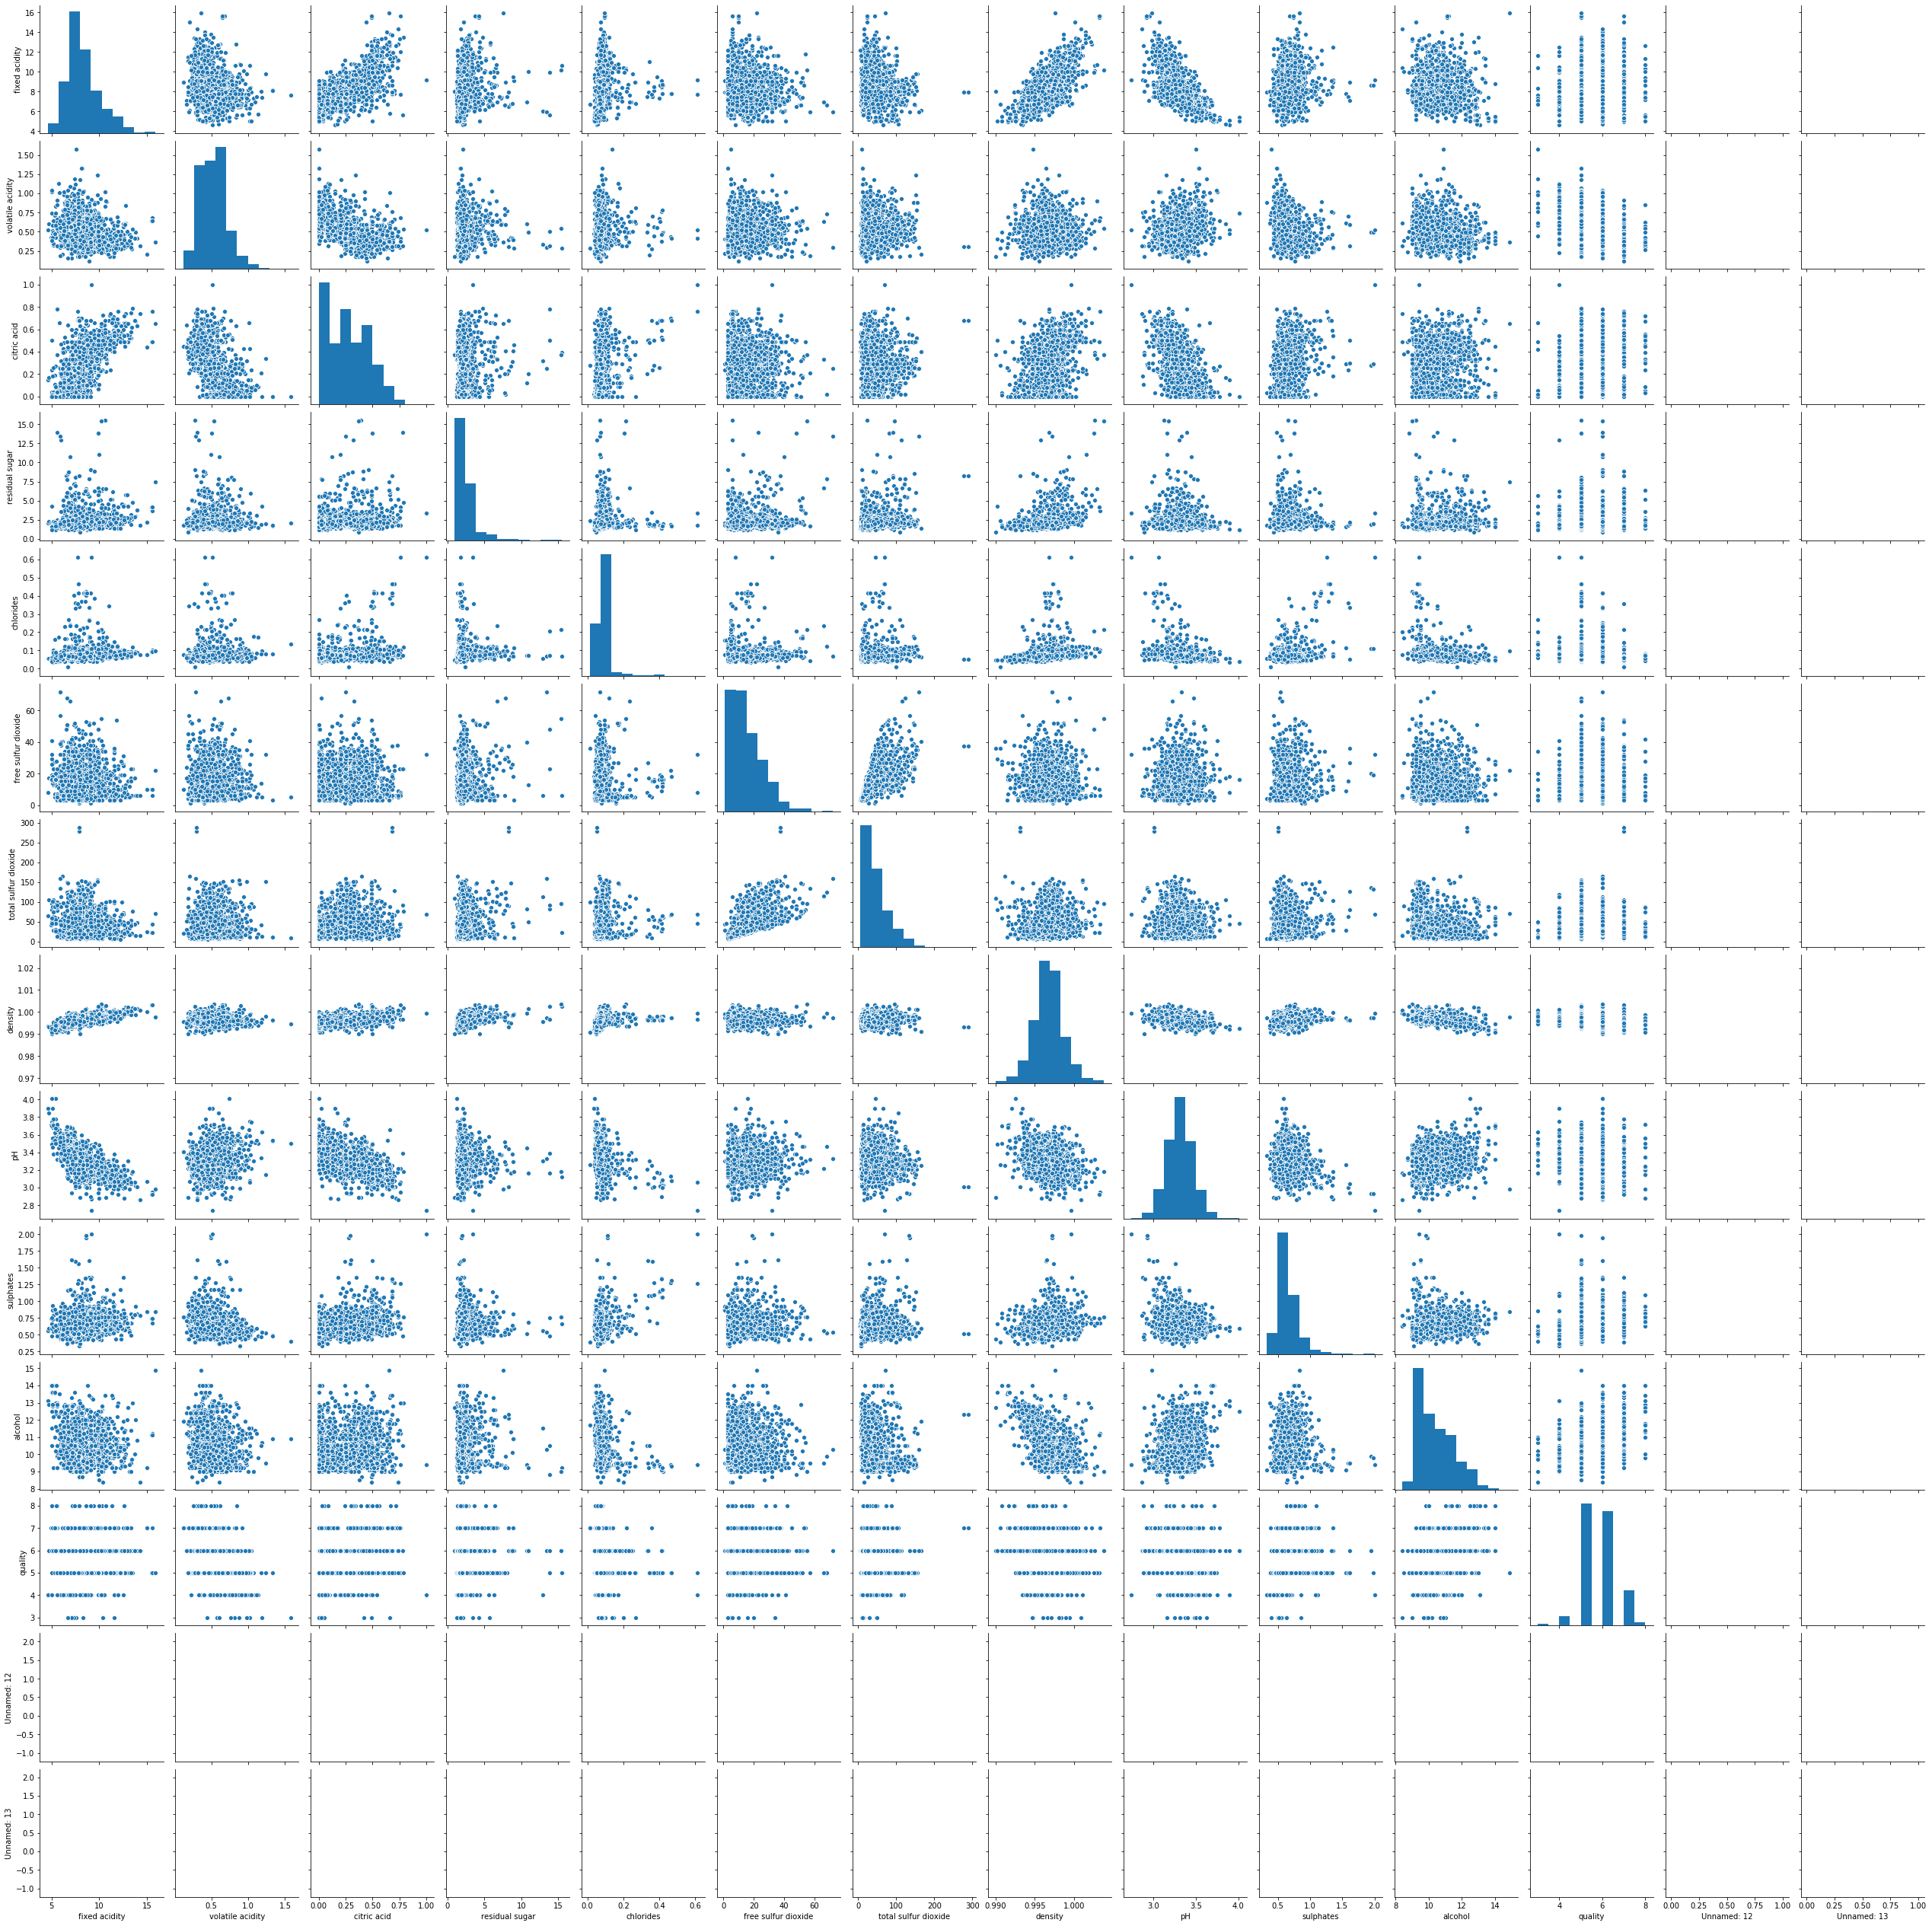

In [85]:
sns.pairplot(df)

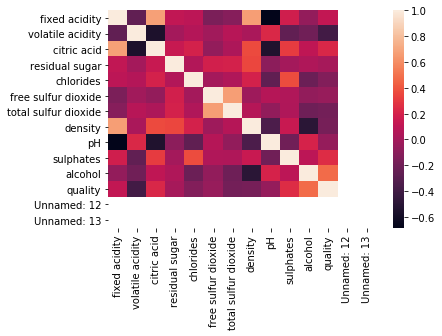

In [40]:
sns.heatmap(df.corr())
plt.show()

In [29]:
x = df.iloc[:,:11]
y = df.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [30]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1199, 11)
(1199,)
(400, 11)
(400,)


In [41]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [8]:
features = get_features(0.05)
print(features)
x = df[features]
y = df['quality']

NameError: name 'get_features' is not defined

In [43]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [44]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

NameError: name 'x' is not defined

# MODELLING

# LINEAR REGRESSION

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [46]:
y_test.shape

(400,)

In [31]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [48]:
regressor.coef_

array([ 0.01773723, -0.99256049, -0.13962865, -1.59094279,  0.00559652,
       -0.00351973,  0.76859036, -0.43741414,  0.81288805,  0.30148385])

In [49]:
train_pred = regressor.predict(x_train)
train_pred

array([5.33777144, 5.33826411, 5.9503318 , ..., 6.3903182 , 6.19979375,
       5.27597259])

In [50]:
test_pred = regressor.predict(x_test)
test_pred

array([5.10801475, 5.65933623, 5.90407267, 6.13461179, 5.00611866,
       5.44514691, 5.05735245, 6.15497513, 5.51919603, 5.77259374,
       5.61809366, 5.23616173, 5.23544213, 5.31968644, 6.47007277,
       5.043404  , 5.85287121, 5.19427909, 6.07727089, 6.34949018,
       6.42525555, 5.51221957, 5.8030796 , 4.93637817, 5.16618356,
       5.48255293, 5.13758624, 6.60000969, 5.88754763, 5.74133915,
       6.09716961, 6.29379754, 4.91269821, 5.88611904, 5.11007273,
       5.94574773, 6.80685536, 5.04305653, 5.25438683, 5.88611904,
       5.17406542, 4.84008442, 6.48781656, 5.40521715, 5.31105571,
       5.84484462, 5.7100681 , 5.24300809, 5.25021217, 5.46398911,
       5.08740494, 5.61369555, 6.01375792, 6.32497377, 5.47511954,
       5.36466869, 5.09234555, 4.92625623, 5.21415941, 5.08274744,
       4.79570013, 5.4377645 , 5.25237771, 5.68830391, 5.85145609,
       6.52420079, 5.38691412, 5.71775637, 5.17641417, 5.99156845,
       5.6445189 , 5.60892012, 5.74967567, 5.21702288, 5.97975

In [52]:
predicted_data = np.round_(test_pred)
predicted_data

array([5., 6., 6., 6., 5., 5., 5., 6., 6., 6., 6., 5., 5., 5., 6., 5., 6.,
       5., 6., 6., 6., 6., 6., 5., 5., 5., 5., 7., 6., 6., 6., 6., 5., 6.,
       5., 6., 7., 5., 5., 6., 5., 5., 6., 5., 5., 6., 6., 5., 5., 5., 5.,
       6., 6., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 7., 5., 6.,
       5., 6., 6., 6., 6., 5., 6., 6., 5., 6., 6., 6., 6., 5., 5., 6., 6.,
       5., 5., 6., 6., 6., 6., 6., 6., 5., 5., 5., 5., 5., 5., 7., 6., 6.,
       6., 6., 6., 5., 5., 5., 5., 6., 6., 5., 6., 6., 5., 5., 5., 5., 6.,
       6., 6., 5., 5., 5., 6., 6., 6., 6., 5., 5., 5., 5., 6., 6., 7., 6.,
       6., 6., 5., 5., 6., 7., 5., 5., 6., 5., 6., 6., 7., 5., 5., 5., 6.,
       5., 5., 6., 6., 5., 5., 6., 6., 6., 6., 6., 6., 5., 6., 5., 5., 6.,
       6., 7., 5., 6., 6., 5., 6., 6., 5., 6., 7., 5., 6., 6., 6., 6., 6.,
       5., 6., 6., 6., 7., 5., 5., 5., 5., 5., 6., 6., 5., 5., 5., 6., 6.,
       5., 6., 5., 6., 5., 5., 6., 6., 6., 6., 6., 6., 6., 5., 5., 5., 5.,
       5., 6., 5., 6., 5.

In [53]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.4844340755985101
Mean Squared Error: 0.39380413462864766
Root Mean Squared Error: 0.6275381539226501


# LOGISTIC REGRESSION

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score



# creating the model
model = LogisticRegression()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))
# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.7422852376980817
Testing accuracy : 0.735
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       204
           1       0.73      0.73      0.73       196

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.74      0.73      0.74       400

[[150  54]
 [ 52 144]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Stochastic Gradient Descent Classifier

In [34]:
from sklearn.linear_model import SGDClassifier

# creating the model
model = SGDClassifier(penalty=None)

# feeding the training model into the model
model.fit(x_train, y_train)

# predicting the values for the test set
y_pred = model.predict(x_test)

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.89      0.75       204
           1       0.82      0.49      0.62       196

    accuracy                           0.70       400
   macro avg       0.73      0.69      0.68       400
weighted avg       0.73      0.70      0.68       400



In [35]:
print("Train accuracy :",model.score(x_train, y_train))
print("Testing accuracy:", model.score(x_test, y_test))

Train accuracy : 0.6713928273561302
Testing accuracy: 0.6975


# Support Vector Machine

In [100]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 0.5104253544620517
Testing accuracy : 0.5025


In [101]:
param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)


In [ ]:
grid_svc.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
grid_svc.best_params_

In [ ]:
model2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(classification_report(y_test, y_pred))

# Decision Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

In [ ]:
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


In [ ]:
model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

In [ ]:
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


In [36]:
model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

0.6964425770308122

# Multi Layer Perceptron

In [42]:
from sklearn.neural_network import MLPClassifier

# creating the model
model = MLPClassifier(hidden_layer_sizes = (200, 150), max_iter = 150)

# feeding the training data to the model
model.fit(x_train, y_train)

# calculating the accuracies
print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

training accuracy : 0.7447873227689742
testing accuracy : 0.7125
